 Exploratory Data Analysis (EDA)    

In [1]:
#Analyze Crop Distribution
import pandas as pd

# Load the dataset
df = pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Final/DS_Crop_Production_Prediction/FAOSTAT_data.xlsx')

# Crop distribution
crop_summary = df.groupby('Item')['Value'].sum().sort_values(ascending=False)
print("Most Cultivated Crops:")
print(crop_summary.head())

# Geographical focus
area_summary = df.groupby('Area')['Value'].sum().sort_values(ascending=False)
print("Regions with High Agricultural Activity:")
print(area_summary.head())

Most Cultivated Crops:
Item
Hen eggs in shell, fresh                          1.179191e+10
Meat of pig with the bone, fresh or chilled       1.118344e+10
Fat of pigs                                       1.040141e+10
Edible offal of pigs, fresh, chilled or frozen    1.038207e+10
Sugar cane                                        1.035540e+10
Name: Value, dtype: float64
Regions with High Agricultural Activity:
Area
China                       3.710745e+10
China, mainland             3.683336e+10
India                       1.668822e+10
Brazil                      1.051927e+10
United States of America    9.458927e+09
Name: Value, dtype: float64


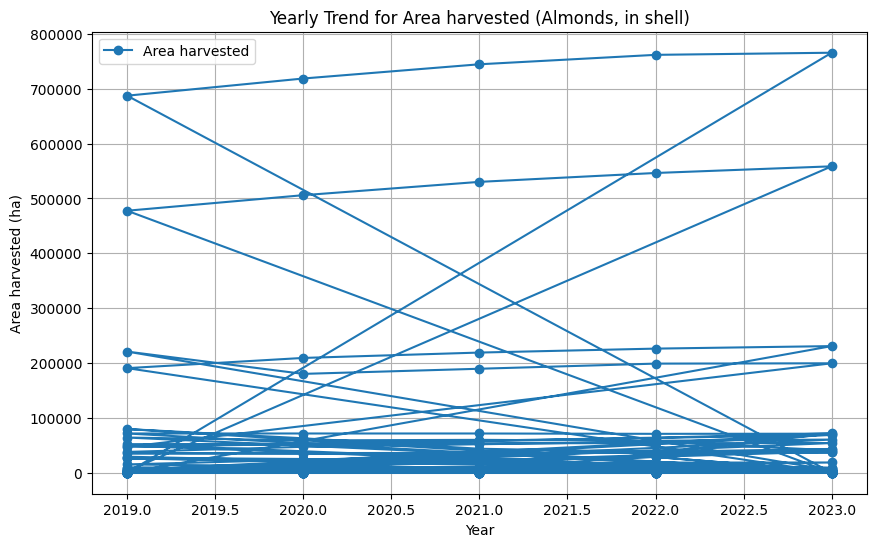

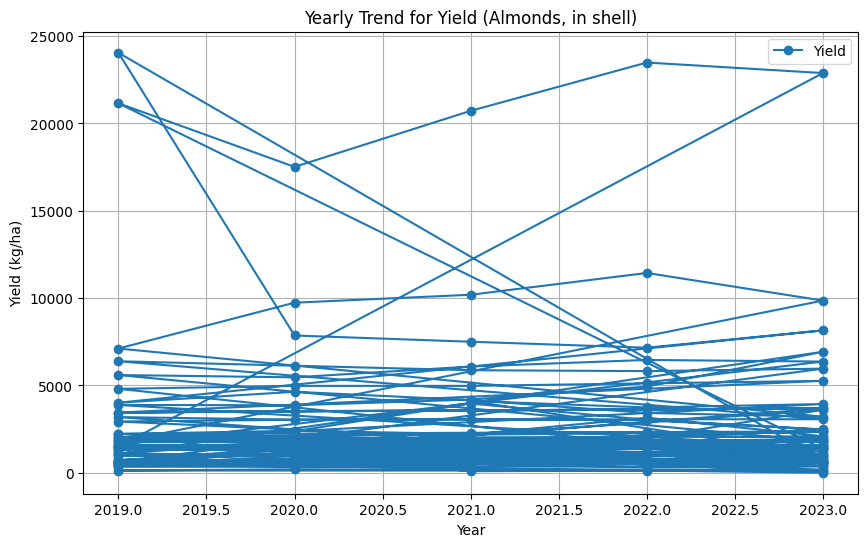

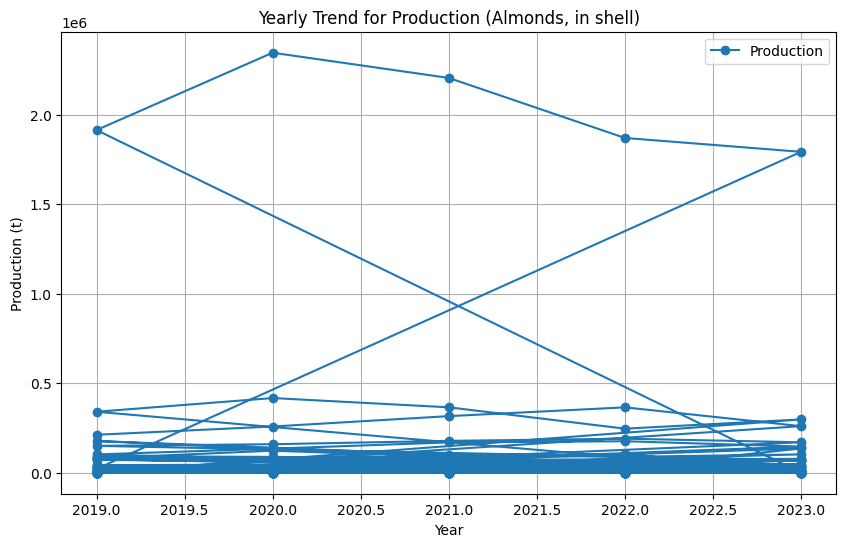

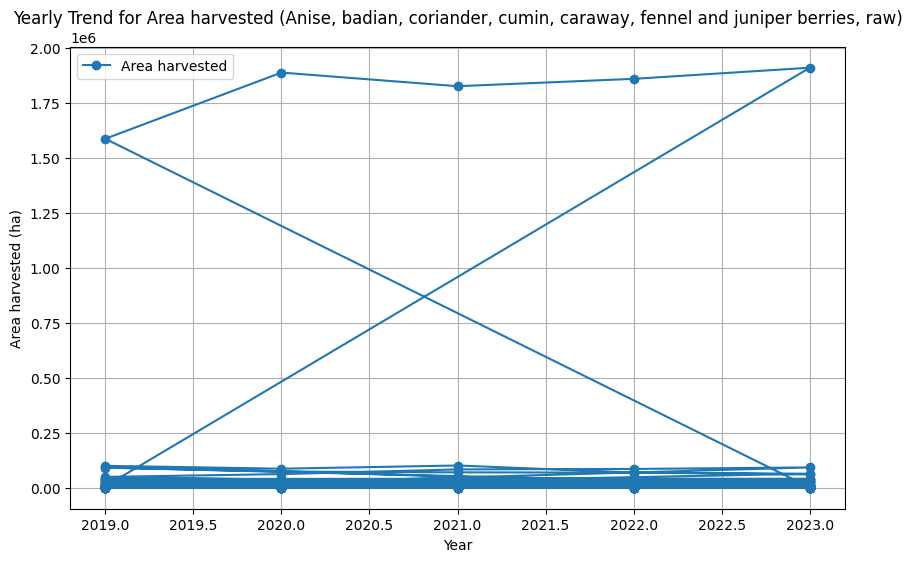

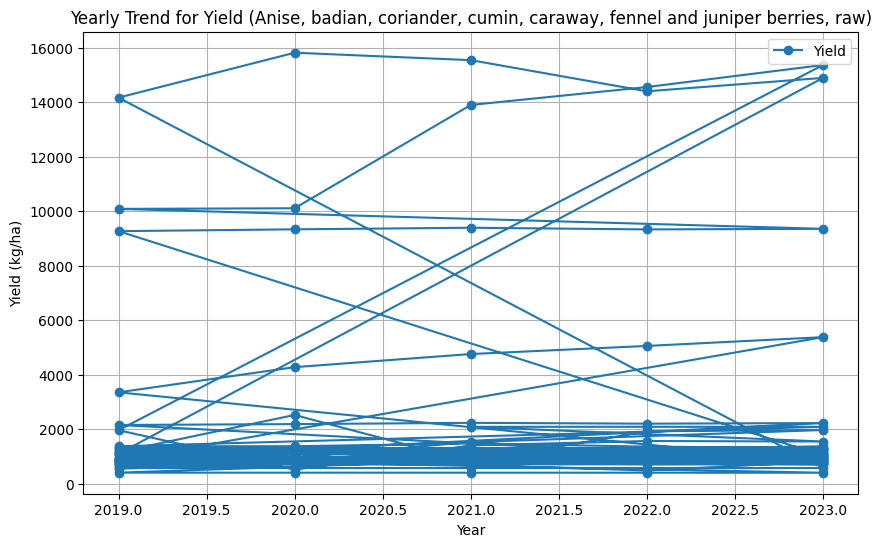

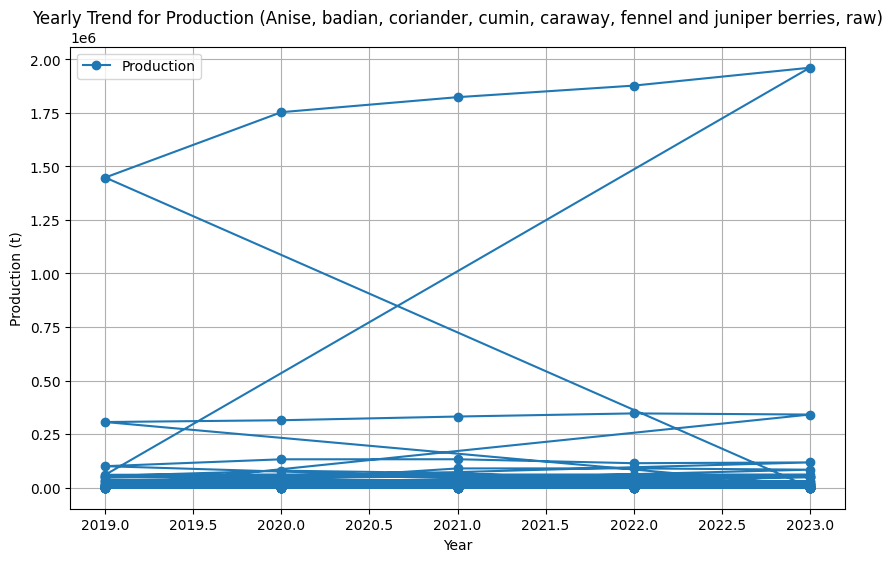

Growth Rate for Area harvested (Almonds, in shell) over 2019-2023: -69.91%
Growth Rate for Yield (Almonds, in shell) over 2019-2023: 16.60%
Growth Rate for Production (Almonds, in shell) over 2019-2023: -64.91%
Growth Rate for Area harvested (Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw) over 2019-2023: -99.55%
Growth Rate for Yield (Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw) over 2019-2023: 4.83%
Growth Rate for Production (Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw) over 2019-2023: -99.53%


In [2]:
#Temporal Analysis

# #import pandas as pd
import matplotlib.pyplot as plt

# Function to plot yearly trends for Area harvested, Yield, Production
def plot_trends(df, element, crop):
    subset = df[(df['Element'] == element) & (df['Item'] == crop)]
    plt.figure(figsize=(10, 6))
    plt.plot(subset['Year'], subset['Value'], marker='o', label=element)
    plt.title(f'Yearly Trend for {element} ({crop})')
    plt.xlabel('Year')
    plt.ylabel(f'{element} ({subset["Unit"].iloc[0]})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Analyze trends for Area harvested, Yield, Production for Almonds
plot_trends(df, 'Area harvested', 'Almonds, in shell')
plot_trends(df, 'Yield', 'Almonds, in shell')
plot_trends(df, 'Production', 'Almonds, in shell')

# Analyze trends for Area harvested, Yield, Production for Anise & similar crops
plot_trends(df, 'Area harvested', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')
plot_trends(df, 'Yield', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')
plot_trends(df, 'Production', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')

# Growth Analysis Function
def growth_analysis(df, element, crop):
    subset = df[(df['Element'] == element) & (df['Item'] == crop)]
    growth_rate = (subset['Value'].iloc[-1] - subset['Value'].iloc[0]) / subset['Value'].iloc[0] * 100
    print(f'Growth Rate for {element} ({crop}) over {subset["Year"].iloc[0]}-{subset["Year"].iloc[-1]}: {growth_rate:.2f}%')

# Calculate growth rates for Almonds
growth_analysis(df, 'Area harvested', 'Almonds, in shell')
growth_analysis(df, 'Yield', 'Almonds, in shell')
growth_analysis(df, 'Production', 'Almonds, in shell')

# Calculate growth rates for Anise & similar crops
growth_analysis(df, 'Area harvested', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')
growth_analysis(df, 'Yield', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')
growth_analysis(df, 'Production', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw')

<module 'matplotlib.pyplot' from 'D:\\Lib\\site-packages\\matplotlib\\pyplot.py'>

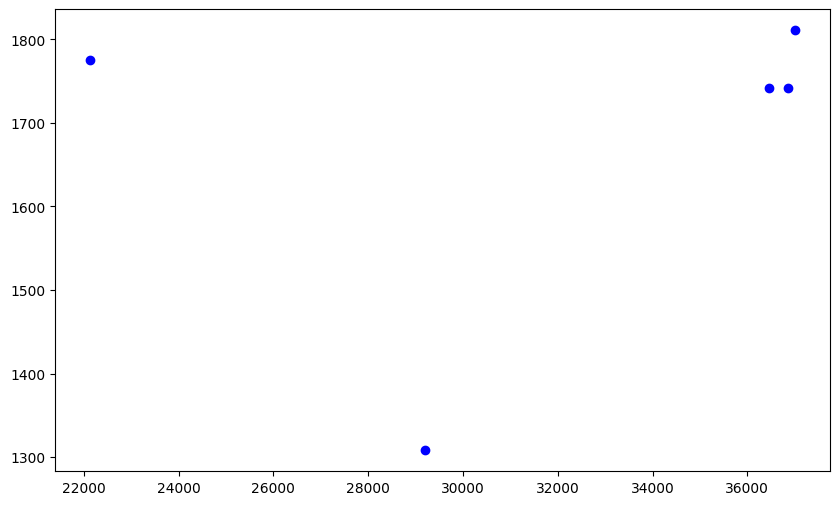

In [3]:
#Environmental Relationships
#import pandas as pd
#import matplotlib.pyplot as plt

# Sample dataset (replace with actual data)
data = {
    'Year': [2019, 2020, 2021, 2022, 2023],
    'Area_harvested': [29203, 22134, 36862, 36462, 37000],  # hectares
    'Yield': [1308.3, 1775.3, 1742.3, 1742, 1810.8]         # kg/ha
}

# Create a DataFrame
df1 = pd.DataFrame(data)

# Plotting the relationship between Area harvested and Yield
plt.figure(figsize=(10, 6))
plt.scatter(df1['Area_harvested'], df1['Yield'], color='blue', label='Data Points')
plt

In [4]:
print(df.columns)


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


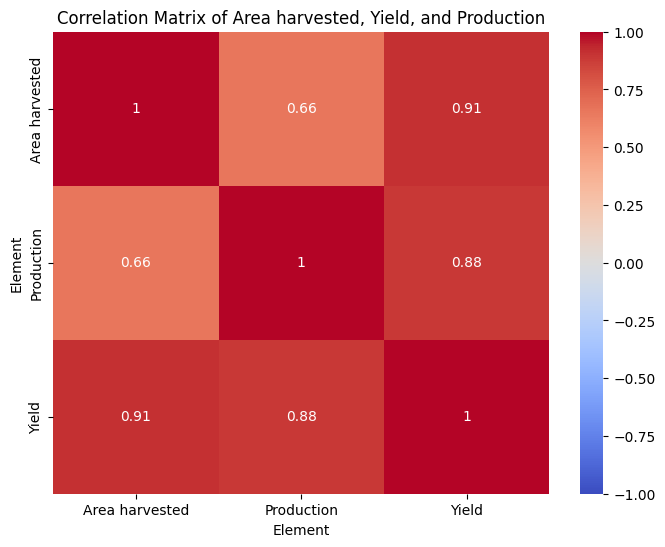

Correlation Matrix:
Element         Area harvested  Production     Yield
Element                                             
Area harvested        1.000000    0.661178  0.911601
Production            0.661178    1.000000  0.883914
Yield                 0.911601    0.883914  1.000000


In [5]:
#Input-Output Relationships

import seaborn as sns


# Filter for relevant data (Area harvested, Yield, Production)
filtered_data = df[df['Element'].isin(['Area harvested', 'Yield', 'Production'])]

# Pivot data to structure it for analysis
pivot_data = filtered_data.pivot_table(index='Year', columns='Element', values='Value')

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Area harvested, Yield, and Production')
plt.show()

# Interpretation of correlations
print("Correlation Matrix:")
print(correlation_matrix)

In [6]:
#Comparative Analysis
import pandas as pd
import numpy as np

# Sample dataset derived from the image data
data = {
    'Year': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023] * 2,
    'Item': ['Almonds, in shell'] * 15 + ['Anise, badian, etc.'] * 15,
    'Element': ['Area harvested', 'Yield', 'Production'] * 10,
    'Value': [29203, 1308.3, 38205, 22134, 1775.3, 39307, 36862, 1742.3, 64256, 36462, 1742, 63515, 37000, 1810.8, 67000,
              25293, 704.1, 17807.76, 25558, 704.1, 17965.5, 25357, 705, 17876.49, 25403, 705, 17883.38, 25439, 705, 17890.27],
    'Unit': ['ha', 'kg/ha', 't'] * 10
}

# Create DataFrame
df = pd.DataFrame(data)

# --- Comparative Analysis ---

# Compare yields (Yield) of different crops
yield_df = df[df['Element'] == 'Yield'].groupby('Item')['Value'].mean()
high_yield_crop = yield_df.idxmax()
low_yield_crop = yield_df.idxmin()

# Compare production (Production) across crops/regions
production_df = df[df['Element'] == 'Production'].groupby('Item')['Value'].mean()
high_production_crop = production_df.idxmax()

# --- Productivity Analysis ---

# Calculate productivity ratios: Production / Area harvested
area_df = df[df['Element'] == 'Area harvested'].reset_index(drop=True)
prod_df = df[df['Element'] == 'Production'].reset_index(drop=True)
productivity_ratios = prod_df['Value'] / area_df['Value']

# Examine variations in Yield
yield_variations = df[df['Element'] == 'Yield'].groupby('Item')['Value'].std()

# --- Output Results ---
print("Comparative Analysis:")
print(f"High-yield crop: {high_yield_crop} with average yield {yield_df[high_yield_crop]:.2f} kg/ha")
print(f"Low-yield crop: {low_yield_crop} with average yield {yield_df[low_yield_crop]:.2f} kg/ha")
print(f"High production crop: {high_production_crop} with total production {production_df[high_production_crop]:.2f} t")

print("\nProductivity Analysis:")
print(f"Productivity Ratios (Production/Area harvested):\n{productivity_ratios}")
print(f"Yield Variations (Standard Deviation):\n{yield_variations}")

Comparative Analysis:
High-yield crop: Almonds, in shell with average yield 1675.74 kg/ha
Low-yield crop: Anise, badian, etc. with average yield 704.64 kg/ha
High production crop: Almonds, in shell with total production 54456.60 t

Productivity Analysis:
Productivity Ratios (Production/Area harvested):
0    1.308256
1    1.775865
2    1.743150
3    1.741951
4    1.810811
5    0.704059
6    0.702931
7    0.704992
8    0.703987
9    0.703262
Name: Value, dtype: float64
Yield Variations (Standard Deviation):
Item
Almonds, in shell      207.356078
Anise, badian, etc.      0.492950
Name: Value, dtype: float64


In [7]:
#Outliers and Anomalies

import pandas as pd
import numpy as np

# Sample dataset derived from the image
data = {
    'Year': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023] * 2,
    'Item': ['Almonds, in shell'] * 15 + ['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw'] * 15,
    'Element': ['Yield', 'Production'] * 15,
    'Value': [1308.3, 38205, 1775.3, 39307, 1742.3, 64256, 1742, 63515, 1810.8, 67000, 704.1, 17807.76, 704.1, 17965.5, 705,
              17876.49, 705, 17883.38, 705, 17890.27, 705, 704.1, 705, 704.1, 2555.8, 2543.5, 2530.3, 704.1, 2558, 2554],
    'Unit': ['kg/ha', 't'] * 15
}

# Create DataFrame
df = pd.DataFrame(data)

# Identify anomalies using Z-score
df['Z-score'] = np.abs((df['Value'] - df['Value'].mean()) / df['Value'].std())

# Set a threshold for identifying anomalies
threshold = 2

# Filter anomalies
anomalies = df[df['Z-score'] > threshold]

# Print anomalies
print("Anomalies in Yield or Production:")
print(anomalies)

# Correlate anomalies with external factors (example)
external_factors = pd.DataFrame({'Year': [2019, 2020, 2021, 2022, 2023],
                                 'Factor': ['Policy A', 'Policy B', 'Drought', 'Policy C', 'Flood']})

# Merge anomalies with external factors
anomalies_with_factors = pd.merge(anomalies, external_factors, on='Year')

# Print anomalies with external factors
print("\nAnomalies correlated with external factors:")
print(anomalies_with_factors)

Anomalies in Yield or Production:
   Year               Item     Element    Value Unit   Z-score
5  2020  Almonds, in shell  Production  64256.0    t  2.495011
7  2021  Almonds, in shell  Production  63515.0    t  2.458944
9  2022  Almonds, in shell  Production  67000.0    t  2.628570

Anomalies correlated with external factors:
   Year               Item     Element    Value Unit   Z-score    Factor
0  2020  Almonds, in shell  Production  64256.0    t  2.495011  Policy B
1  2021  Almonds, in shell  Production  63515.0    t  2.458944   Drought
2  2022  Almonds, in shell  Production  67000.0    t  2.628570  Policy C
